In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np

# import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import json 

#plot confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# import stratified k fold
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier


from xgboost import XGBClassifier
import re


import statistics


from sklearn.model_selection import GridSearchCV

# import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold



from sklearn.metrics import make_scorer







# Helper Functions

In [6]:
#plot roc curve
from sklearn.metrics import roc_curve, auc
#plot roc curve
def plot_roc_curve(y_test, y_pred,label):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: '+label)
    plt.legend(loc="lower right")
    plt.show()


In [7]:
# plot confusion matrix function
def plot_confusion_matrix(y_test, y_pred, label):
    cm = confusion_matrix(y_test.tolist(), y_pred.tolist())
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title('Confusion Matrix: '+label)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [8]:
# function for metrics
def metrics(X,y,y_test, y_pred, modell = None, crossval = True):


    print("----- Metric for 80/20 Split -----")
    print("Accuracy score:", accuracy_score(y_test, y_pred))
    print("Recall score:", recall_score(y_test, y_pred))
    print("Precision score:", precision_score(y_test, y_pred))
    print("fbeta score:", fbeta_score(y_test, y_pred, beta=2))
    print("----- Metric for Cross Validation -----")

    if crossval == True:
        modell.fit(X,y)
        
        print("Crossval score:", statistics.mean(cross_val_score(modell ,X, y, scoring=f2,cv = cv )))
        # print all the scores
        print("Crossval score:", cross_val_score(modell ,X, y, scoring=f2,cv = cv ))

In [9]:
# append metrics to dictionary
def metrics_dict_non_opt(y_test, y_pred, label, modell = None):
    Non_opt_results["Algo_name"].append(label)
    Non_opt_results["Recall"].append(recall_score(y_test, y_pred))
    Non_opt_results["Precision"].append(precision_score(y_test, y_pred))
    Non_opt_results["Accuracy"].append(accuracy_score(y_test, y_pred))
    Non_opt_results["F2"].append(fbeta_score(y_test, y_pred,beta=2))
    Non_opt_results["F2-CV"].append(statistics.mean(cross_val_score(modell ,X, y, scoring=f2,cv = cv )))


def metrics_dict_opt(y_test, y_pred, label, modell = None):
    Opt_results["Algo_name"].append(label)
    Opt_results["Recall"].append(recall_score(y_test, y_pred))
    Opt_results["Precision"].append(precision_score(y_test, y_pred))
    Opt_results["Accuracy"].append(accuracy_score(y_test, y_pred))
    Opt_results["F2"].append(fbeta_score(y_test, y_pred,beta=2))
    Opt_results["F2-CV"].append(statistics.mean(cross_val_score(modell ,X, y, scoring=f2,cv = cv )))

In [10]:
def f2_measure(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=2)
f2 = make_scorer(f2_measure)

In [11]:

# load german_data_cleaned.csv
german_data = pd.read_csv('german_data_cleaned.csv')

In [12]:
german_data

,Installmentrate %,PresentResidence,Age in years,Number existing Credits,Number people liable,Target,Credit Amount per Month,Status Checking_0 less than or equal and less than 200 DM,Status Checking_bigger than 200DM / salary assignments for at least 1 year,Status Checking_less than 0 DM,...,Housing_own,Housing_rent,Job_management/self-employed/highly qualified employee/officer,Job_skilled employee /official,Job_unemployed/unskilled-non-resident,Job_unskilled-resident,Telephone_None,"Telephone_yes, registered under the customers name",Foreign Worker_no,Foreign Worker_yes
0,4,4,67,2,1,0,194.833333,0,0,1,...,1,0,0,1,0,0,0,1,0,1
1,2,2,22,1,1,1,123.979167,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,2,3,49,1,2,0,174.666667,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,2,4,45,1,2,0,187.666667,0,0,1,...,0,0,0,1,0,0,1,0,0,1
4,3,4,53,2,2,1,202.916667,0,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,3,4,31,1,1,0,144.666667,0,0,0,...,1,0,0,0,0,1,1,0,0,1
971,4,4,40,1,1,0,128.566667,0,0,1,...,1,0,1,0,0,0,0,1,0,1
972,4,4,38,1,1,0,67.000000,0,0,0,...,1,0,0,1,0,0,1,0,0,1
973,4,4,23,1,1,1,41.000000,0,0,1,...,0,0,0,1,0,0,0,1,0,1


# Split Feauture und Target

In [13]:
# split features and target
X = german_data.drop(['Target'], axis=1)
y = german_data['Target']

In [14]:

# Kreuzvalidierung
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

In [15]:
# create dictionary with algo names and score metrics for later analysis

Non_opt_results = {"Algo_name": [], "Recall": [],"Precision": [],"Accuracy": [], "F2": [], "F2-CV": []}

In [16]:
# split data into train and test set 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling Non-Optimized

## Logistic Regression

In [ ]:
# use logistic regression to predict target variable
# create logistic regression model with standard parameters

def logistic_regression(X_train, X_test, y_train, y_test):
    logreg = LogisticRegression(random_state=42)
    # fit the model
    logreg.fit(X_train, y_train)
    # predict the target variable
    y_pred = logreg.predict(X_test)

    # print accuracy score and recall score
    metrics(X,y,y_test, y_pred, crossval=True, modell=logreg)



    # add algo name and recall score to dictionary
    metrics_dict_non_opt(y_test, y_pred, "Logistic Regression", logreg)
    plot_roc_curve(y_test, y_pred,"Logistic Regression")
    plot_confusion_matrix(y_test,y_pred,"Logistic Regression")

    return logreg


In [ ]:
logistic_regression(X_train, X_test, y_train, y_test)

## Random Forest

In [ ]:
def random_forest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier( random_state=42)
    rf.fit(X_train, y_train)
    # predict the target variable
    y_pred = rf.predict(X_test)
    # print accuracy score and recall score
    metrics(X,y,y_test, y_pred, crossval=True, modell=rf)


    metrics_dict_non_opt(y_test, y_pred, "Random forest", rf)


    # show feature importance for random forest

    importances = rf.feature_importances_
    # plot importances
    plt.figure(figsize=(10,10))
    # order importances
    indices = np.argsort(importances)[::-1]
    sns.barplot(x=importances[indices], y=X_train.columns, orient='h')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.show()

    plot_roc_curve(y_test, y_pred,"Random Forest")
    plot_confusion_matrix(y_test,y_pred,"Random Forest")


In [ ]:
random_forest(X_train, X_test, y_train, y_test)

## Neuronal Network

Normalerweise würde man die Daten für das Training mit einem Neuronalen Netz mithilfe eines scaler nomalisieren bzw. skalieren.
Dies wurde auch mithilfe des minmax scalers und dem standardscaler versucht. Allerdings hatten beide einen negativen Einfluss auf die Ergebnisse des Modells

In [ ]:
# use neuro network to predict target variable
# als baseline werden die Standardparameter verwendet
# normalisieren
# fit the model

# import standard scaler from sklearn
from sklearn.preprocessing import StandardScaler


def neuronal_network(X_train, X_test, y_train, y_test):
    

    nn = MLPClassifier(hidden_layer_sizes=(100), random_state=42)
    nn.fit(X_train, y_train)
    # predict the target variable
    y_pred = nn.predict(X_test)
    # print accuracy score and recall score
    metrics(X,y,y_test, y_pred, crossval=True, modell=nn)


    metrics_dict_non_opt(y_test, y_pred, "Neural Network", nn)

    plot_roc_curve(y_test, y_pred,"Neural Network")
    plot_confusion_matrix(y_test,y_pred,"Neural Network")

In [ ]:
neuronal_network(X_train, X_test, y_train, y_test)

## xGboost

In [ ]:
# use xgboost to predict target variable
def xgboost(X_train, X_test, y_train, y_test):
    regex = re.compile(r"\[|\]|<", re.IGNORECASE)

    X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
    X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

    # fit the model
    xgb = XGBClassifier(random_state=42)


    xgb.fit(X_train, y_train)
    # predict the target variable
    y_pred = xgb.predict(X_test)
    # print accuracy score and recall score
    metrics(X,y,y_test, y_pred, crossval=True, modell=xgb)


    metrics_dict_non_opt(y_test, y_pred, "xGboost", xgb)

    plot_roc_curve(y_test, y_pred,"xGboost")
    plot_confusion_matrix(y_test,y_pred,"xGboost")


In [ ]:
xgboost(X_train, X_test, y_train, y_test)

# Modelling Optimized with Hyperparametertuning

In [ ]:
# dictionary for hypertuned modells
Opt_results = {"Algo_name": [], "Recall": [],"Precision": [],"Accuracy": [], "F2": [], "F2-CV": []}

## Logistic Regression Hyperparamter Tuning

In [ ]:
#hyperparameter tuning for logistic regression
#tune hyperparameters
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'],'intercept_scaling': [100, 500, 1000, 5000, 10000], 'class_weight': ["balanced", None]}
# create grid search object with cross validation
grid_search = GridSearchCV(logistic_regression(X_train, X_test, y_train, y_test), parameters, cv=cv, scoring=f2)
# fit the model
grid_search.fit(X_train, y_train)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# save best hyperparameters in variable
logreg_best_parameters = grid_search.best_params_

In [ ]:
# import optuna
import optuna 
# tune hyperparameters with optuna package
def tune_logistic_regression(X_train, X_test, y_train, y_test):
    # create optuna object
    study = optuna.create_study(direction="maximize")
    # define objective function
    def objective(trial):
        # define hyperparameters
        C = trial.suggest_uniform("C", 0.001, 1000)
        penalty = trial.suggest_categorical("penalty", [ "l2"])
        intercept_scaling = trial.suggest_int("intercept_scaling", 1, 100000)
        class_weight = trial.suggest_categorical("class_weight", ["balanced", None])
        # create logistic regression object
        logreg = LogisticRegression(C=C, penalty=penalty, intercept_scaling=intercept_scaling, class_weight=class_weight, random_state=42)
        # fit the model
        logreg.fit(X_train, y_train)
        # predict the target variable
        y_pred = logreg.predict(X_test)
        # return recall score
        return recall_score(y_test, y_pred)
    # run optimization with objective function
    study.optimize(objective, n_trials=100)
    # print the best hyperparameters
    print("Best hyperparameters:", study.best_params)
    print("Best score:", study.best_value)
    # save best hyperparameters in variable
    logreg_best_parameters = study.best_params
    # create logistic regression object with best hyperparameters
    logreg = LogisticRegression(C=logreg_best_parameters["C"], penalty=logreg_best_parameters["penalty"], intercept_scaling=logreg_best_parameters["intercept_scaling"], class_weight=logreg_best_parameters["class_weight"], random_state=42)
    # fit the model
    logreg.fit(X_train, y_train)
    # predict the target variable
    y_pred = logreg.predict(X_test)
    # print accuracy score and recall score
    metrics(X,y,y_test, y_pred, crossval=True, modell=logreg)

tune_logistic_regression(X_train, X_test, y_train, y_test)

## Random Forest Optimized

## xGboost Optimized

## Neuronal Network Optimized

# Over/Undersampling

In [ ]:
# import smote from imbalanced-learn
from imblearn.over_sampling import SMOTE


# Exkurs Explainable AI

In [59]:
import wittgenstein as lw
from wittgenstein.ripper import RIPPER
from wittgenstein.interpret import interpret_model, score_fidelity
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict


In [68]:
# load data to pandas dataframe
ripper_data = pd.read_csv("german_data_ripper.csv")

In [69]:
# drop Zscore
ripper_data = ripper_data.drop(columns=["ZScore"])


# split features and target
X = ripper_data.drop(['Target'], axis=1)
y = ripper_data['Target']

In [83]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [84]:
# funktion for fitting Ripper model
def ripper(X_train, X_test, y_train, y_test):
    # create ripper object
    ripper = lw.RIPPER(random_state=42,k=3, dl_allowance=64, n_discretize_bins=10, verbosity=0)
    # fit the model
    ripper.fit(X_train, y_train)
    # predict the target variable
    y_pred = ripper.predict(X_test)
    # print accuracy score and recall score
    metrics(X,y,y_test, y_pred, crossval=True, modell=ripper)

    metrics_dict_non_opt(y_test, y_pred, "Ripper", ripper)

   
    ripper.out_model()

    plot_roc_curve(y_test, y_pred,"Ripper")
    plot_confusion_matrix(y_test,y_pred,"Ripper")
    

----- Metric for 80/20 Split -----
Accuracy score: 0.695
Recall score: 0.22033898305084745
Precision score: 0.4642857142857143
fbeta score: 0.24621212121212124
----- Metric for Cross Validation -----
Crossval score: 0.2183103853854432
Crossval score: [0.49342105 0.06147541 0.07968127 0.05859375 0.09803922 0.15686275
 0.13779528 0.39930556 0.31598513 0.38194444]
[[StatusChecking=lessthan0DM ^ Installmentrate%=4] V
[StatusChecking=0lessthanorequalandlessthan200DM ^ CreditHistory=nocreditstanken/allcreditspaidbackduly ^ OtherinstallmentPlans=None] V
[OtherinstallmentPlans=bank ^ PresentResidence=2 ^ Job=skilledemployee/official]]


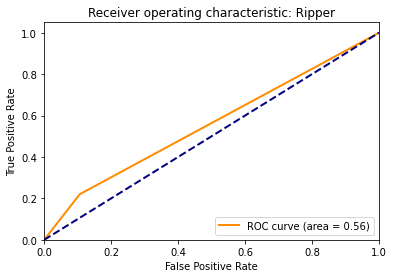

AttributeError: 'list' object has no attribute 'tolist'

In [85]:
ripper(X_train, X_test, y_train, y_test)